In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 30)

In [180]:
df = pd.read_csv("Innovators.csv")

In [181]:
df.shape

(237, 6)

In [192]:
df.head()

,Innovator,Region/Country,Industry,Highlights,Recognition
0,3M,United States,Chemicals and materials,NaN,11
1,Ant Group,"China, Mainland","Software, media, fintech",New entrant,11
2,Becton Dickinson,United States,Medical and biotechnology,NaN,11
3,Chevron,United States,Energy and electrical,NaN,11
4,Dolby Laboratories,United States,Electronics and computing equipment,NaN,11


In [183]:
df_original = df.copy()

In [184]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Innovator       237 non-null    object
 1   Region/Country  237 non-null    object
 2   Industry        237 non-null    object
 3   Highlights      33 non-null     object
 4   Recognition     237 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 9.4+ KB


In [187]:
df.isna().sum()

Innovator           0
Region/Country      0
Industry            0
Highlights        204
Recognition         0
dtype: int64

In [188]:
df.isna().mean()*100

Innovator          0.000000
Region/Country     0.000000
Industry           0.000000
Highlights        86.075949
Recognition        0.000000
dtype: float64

In [189]:
df["Highlights"].value_counts()

Highlights
New entrant                           27
visibility 2020 Innovator to watch     6
Name: count, dtype: int64

In [194]:
df["Highlights"].fillna("unknown", inplace=True)

In [196]:
df.sample(2)

,Innovator,Region/Country,Industry,Highlights,Recognition
164,"Konami Digital Entertainment Co.,Ltd",Japan,"Software, media, fintech",unknown,1
8,KAIST,South Korea,Government and academic research,unknown,11


In [197]:
df["Region/Country"].value_counts()

Region/Country
United States      85
Japan              66
France             17
Germany            12
South Korea        12
Taiwan             12
China, Mainland     9
Switzerland         5
Netherlands         5
Sweden              5
United Kingdom      3
Liechtenstein       1
Belgium             1
Canada              1
Finland             1
Russia              1
Saudi Arabia        1
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Countries with most innovation'}, xlabel='Region/Country'>

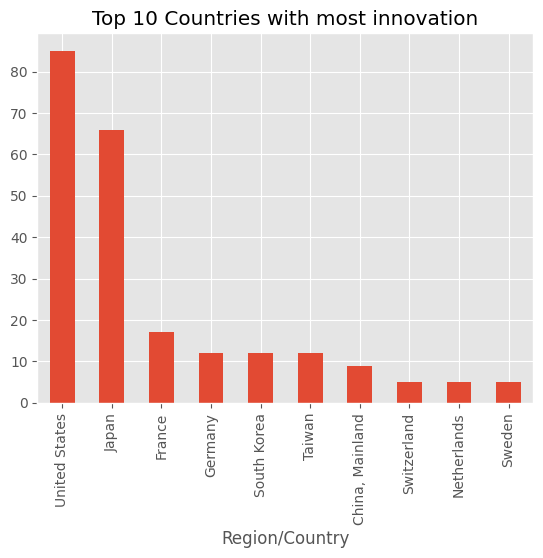

In [199]:
# countries that have most innovation
df["Region/Country"].value_counts().head(10).plot(kind="bar", title="Top 10 Countries with most innovation")

In [200]:
df["Industry"].value_counts()

Industry
Electronics and computing equipment    37
Chemicals and materials                23
Semiconductors                         23
Automotive                             22
Industrial systems                     22
Telecommunications                     16
Software, media, fintech               13
Government and academic research       13
Aerospace and defense                  12
Energy and electrical                  12
Hardware & Electronics                 10
Industrial conglomerate                 9
Pharmaceuticals                         7
Medical and biotechnology               6
Consumer goods and food                 5
Mining and metals                       3
Oil, Gas & Energy                       2
Manufacturing & Medical                 2
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 industries in innovation'}, xlabel='Industry'>

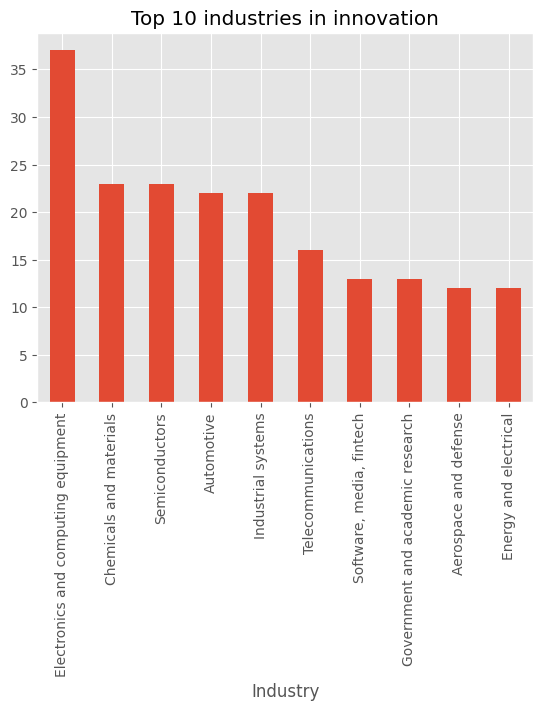

In [201]:
# top ten industries in innovation
df["Industry"].value_counts().head(10).plot(kind="bar", title="Top 10 industries in innovation")

In [205]:
df.groupby("Region/Country")["Innovator"].count()

Region/Country
Belgium             1
Canada              1
China, Mainland     9
Finland             1
France             17
Germany            12
Japan              66
Liechtenstein       1
Netherlands         5
Russia              1
Saudi Arabia        1
South Korea        12
Sweden              5
Switzerland         5
Taiwan             12
United Kingdom      3
United States      85
Name: Innovator, dtype: int64

<Axes: title={'center': 'Countries with number of companies in innovation'}, xlabel='Region/Country'>

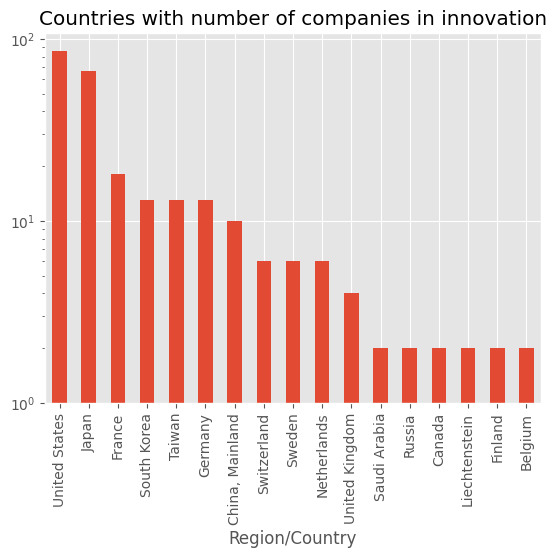

In [208]:
df.groupby("Region/Country")["Innovator"].count().sort_values(ascending=False)\
.plot(kind="bar", title="Countries with number of companies in innovation", log=True)

In [209]:
df.sample(2)

,Innovator,Region/Country,Industry,Highlights,Recognition
55,Arkema,France,Chemicals and materials,unknown,10
144,ETRI,South Korea,Government and academic research,unknown,6


In [216]:
df.groupby("Industry")["Innovator"].count().sort_values(ascending=False)

Industry
Electronics and computing equipment    37
Chemicals and materials                23
Semiconductors                         23
Industrial systems                     22
Automotive                             22
Telecommunications                     16
Government and academic research       13
Software, media, fintech               13
Energy and electrical                  12
Aerospace and defense                  12
Hardware & Electronics                 10
Industrial conglomerate                 9
Pharmaceuticals                         7
Medical and biotechnology               6
Consumer goods and food                 5
Mining and metals                       3
Manufacturing & Medical                 2
Oil, Gas & Energy                       2
Name: Innovator, dtype: int64

<Axes: title={'center': 'Innovation count  per industries'}, xlabel='Industry'>

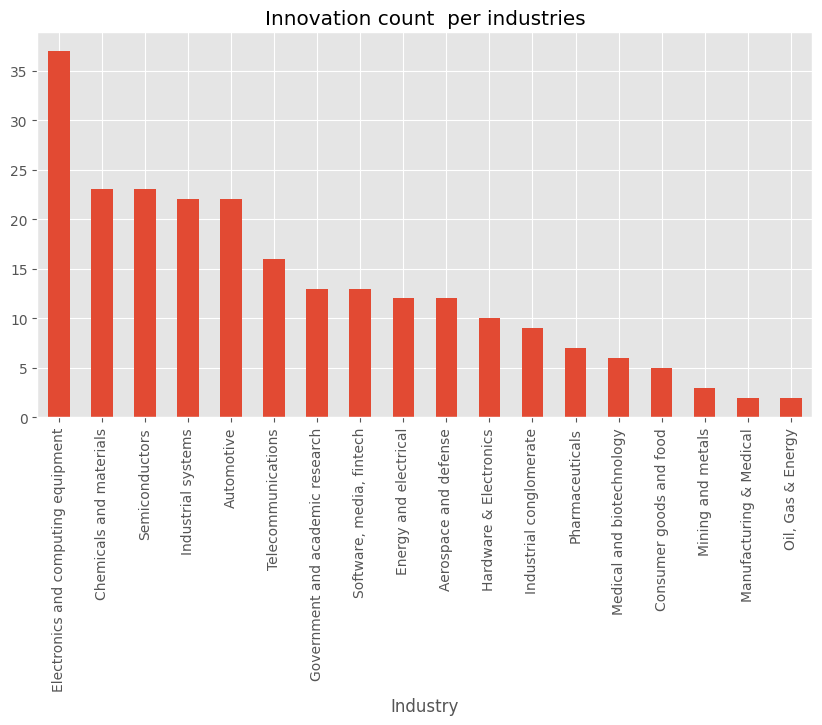

In [218]:
df.groupby("Industry")["Innovator"].count().sort_values(ascending=False)\
.plot(kind="bar", figsize=(10,5), title="Innovation count  per industries")

In [219]:
df.sample(2)

,Innovator,Region/Country,Industry,Highlights,Recognition
175,Deere & Co,United States,Industrial systems,unknown,1
11,Nippon Steel,Japan,Mining and metals,unknown,11


In [221]:
# list all companies from United States
df[df["Region/Country"] == "United States"]["Innovator"]

0                          3M
2            Becton Dickinson
3                     Chevron
4          Dolby Laboratories
6      Goodyear Tire & Rubber
                ...          
223                  Symantec
224                    Amazon
229            Analog Devices
231       Rockwell Automation
234     Rohm and Haas Company
Name: Innovator, Length: 85, dtype: object

In [224]:
df['Region/Country'].unique()

array(['United States', 'China, Mainland', 'Germany', 'France',
       'South Korea', 'Japan', 'United Kingdom', 'Switzerland', 'Canada',
       'Russia', 'Netherlands', 'Taiwan', 'Finland', 'Liechtenstein',
       'Sweden', 'Belgium', 'Saudi Arabia'], dtype=object)

In [230]:
# list all companies from China/Mainland
df[df["Region/Country"] == "China, Mainland"][["Innovator","Recognition"]].sort_values(by="Recognition", ascending=False)

,Innovator,Recognition
1,Ant Group,11
15,TCL Technology,11
69,Tencent,10
38,BOE Technology,7
139,Xiaomi,7
21,China Academy of Telecommunications Technology,6
217,BTD,3
187,Alibaba,1
192,Huawei,1


In [231]:
df.sample(2)

,Innovator,Region/Country,Industry,Highlights,Recognition
94,Foxconn,Taiwan,Electronics and computing equipment,unknown,3
89,Air Products & Chemicals,United States,Chemicals and materials,unknown,3


In [232]:
df[(df["Region/Country"]=="United States") & (df["Industry"] == "Chemicals and materials")]

,Innovator,Region/Country,Industry,Highlights,Recognition
0,3M,United States,Chemicals and materials,unknown,11
22,Dow,United States,Chemicals and materials,unknown,6
40,DuPont,United States,Chemicals and materials,unknown,7
89,Air Products & Chemicals,United States,Chemicals and materials,unknown,3
234,Rohm and Haas Company,United States,Chemicals and materials,unknown,1


<Axes: title={'center': 'United States - Chemicals and materials'}, xlabel='Innovator', ylabel='Innovation count'>

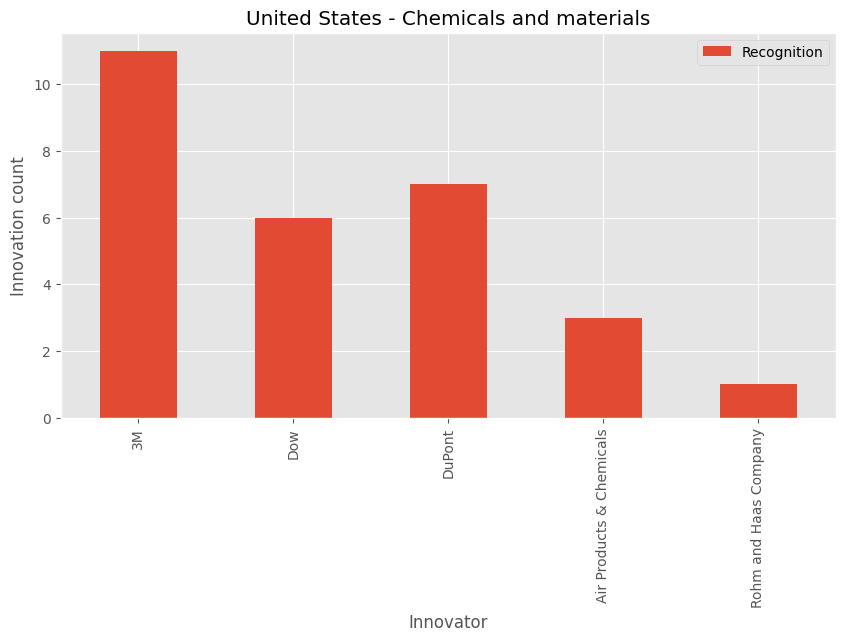

In [235]:
df[(df["Region/Country"]=="United States") & (df["Industry"] == "Chemicals and materials")]\
.plot(kind="bar", figsize=(10,5), x="Innovator", y="Recognition", ylabel="Innovation count", title="United States - Chemicals and materials")

In [236]:
df["Industry"].unique()

array(['Chemicals and materials', 'Software, media, fintech',
       'Medical and biotechnology', 'Energy and electrical',
       'Electronics and computing equipment', 'Industrial systems',
       'Government and academic research', 'Industrial conglomerate',
       'Mining and metals', 'Aerospace and defense', 'Semiconductors',
       'Oil, Gas & Energy', 'Telecommunications',
       'Consumer goods and food', 'Pharmaceuticals', 'Automotive',
       'Hardware & Electronics', 'Manufacturing & Medical'], dtype=object)

In [237]:
df[(df["Region/Country"] == "United States") & (df["Industry"] == "Aerospace and defense")]

,Innovator,Region/Country,Industry,Highlights,Recognition
27,Lockheed Martin,United States,Aerospace and defense,unknown,6
60,Hamilton Sundstrand Corporation,United States,Aerospace and defense,unknown,10
74,Boeing,United States,Aerospace and defense,unknown,7
152,Raytheon Technologies,United States,Aerospace and defense,unknown,6
201,U.S. Department of the Army,United States,Aerospace and defense,unknown,1
214,U.S. Department of the Navy,United States,Aerospace and defense,unknown,6


<Axes: title={'center': 'United States - Aerospace and Defense Industry'}, xlabel='Innovator', ylabel='Innovation count'>

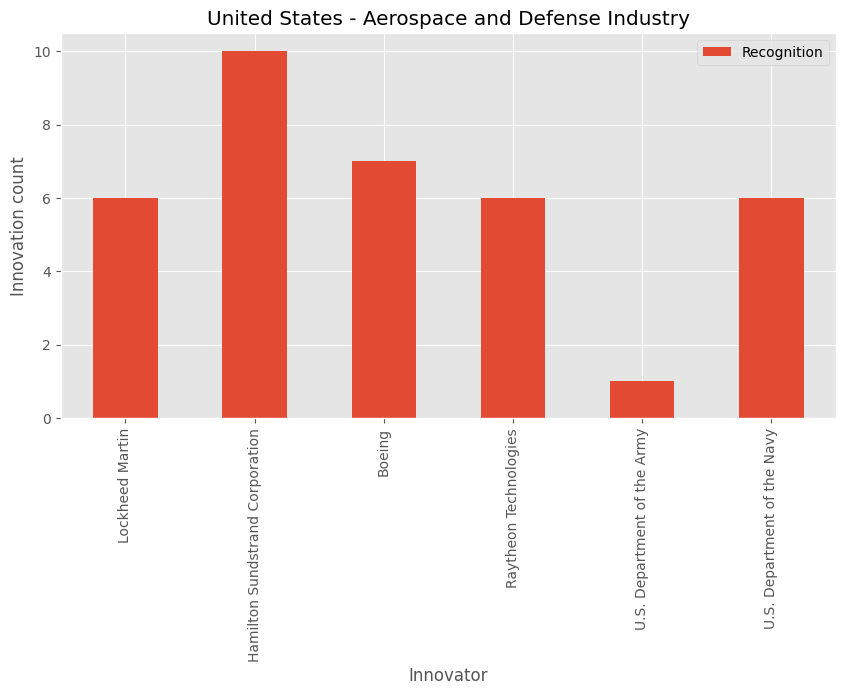

In [238]:
df[(df["Region/Country"] == "United States") & (df["Industry"] == "Aerospace and defense")].plot\
(kind="bar", figsize=(10,5), x="Innovator", y="Recognition", ylabel="Innovation count", title="United States - Aerospace and Defense Industry")

In [242]:
df[df["Region/Country"] == "China, Mainland"]

,Innovator,Region/Country,Industry,Highlights,Recognition
1,Ant Group,"China, Mainland","Software, media, fintech",New entrant,11
15,TCL Technology,"China, Mainland",Electronics and computing equipment,New entrant,11
21,China Academy of Telecommunications Technology,"China, Mainland",Government and academic research,unknown,6
38,BOE Technology,"China, Mainland",Electronics and computing equipment,New entrant,7
69,Tencent,"China, Mainland","Software, media, fintech",unknown,10
139,Xiaomi,"China, Mainland",Telecommunications,unknown,7
187,Alibaba,"China, Mainland","Software, media, fintech",New entrant,1
192,Huawei,"China, Mainland",Telecommunications,unknown,1
217,BTD,"China, Mainland",Automotive,unknown,3


<Axes: title={'center': 'China - Software, Media, Fintech'}, xlabel='Innovator', ylabel='Innovation count'>

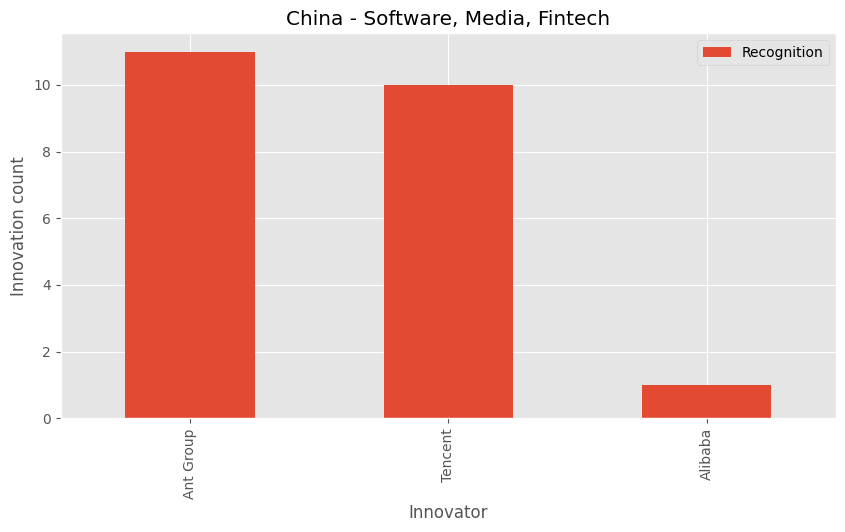

In [245]:
df[(df["Region/Country"] == "China, Mainland") & (df["Industry"] == "Software, media, fintech")].plot\
(kind="bar", figsize=(10,5), x="Innovator", y="Recognition", ylabel="Innovation count", title="China - Software, Media, Fintech")

In [248]:
df[df["Region/Country"] == "Taiwan"]

,Innovator,Region/Country,Industry,Highlights,Recognition
80,Kinpo Electronics,Taiwan,Electronics and computing equipment,visibility 2020 Innovator to watch,7
94,Foxconn,Taiwan,Electronics and computing equipment,unknown,3
105,Wistron,Taiwan,Electronics and computing equipment,New entrant,3
113,ITRI,Taiwan,Government and academic research,unknown,5
115,MediaTek,Taiwan,Semiconductors,unknown,5
124,ASUS,Taiwan,Electronics and computing equipment,unknown,7
135,Quanta Computer,Taiwan,Electronics and computing equipment,unknown,7
168,Realtek Semiconductor,Taiwan,Semiconductors,New entrant,1
173,AU Optronics,Taiwan,Electronics and computing equipment,New entrant,1
177,HTC,Taiwan,Telecommunications,unknown,1


In [249]:
df[df["Region/Country"] == "Taiwan"].groupby("Industry")["Recognition"].sum().sort_values(ascending=False)

Industry
Electronics and computing equipment    29
Semiconductors                          7
Government and academic research        5
Telecommunications                      1
Name: Recognition, dtype: int64

<Axes: title={'center': 'Taiwan - Innovation count per industries'}, xlabel='Industry'>

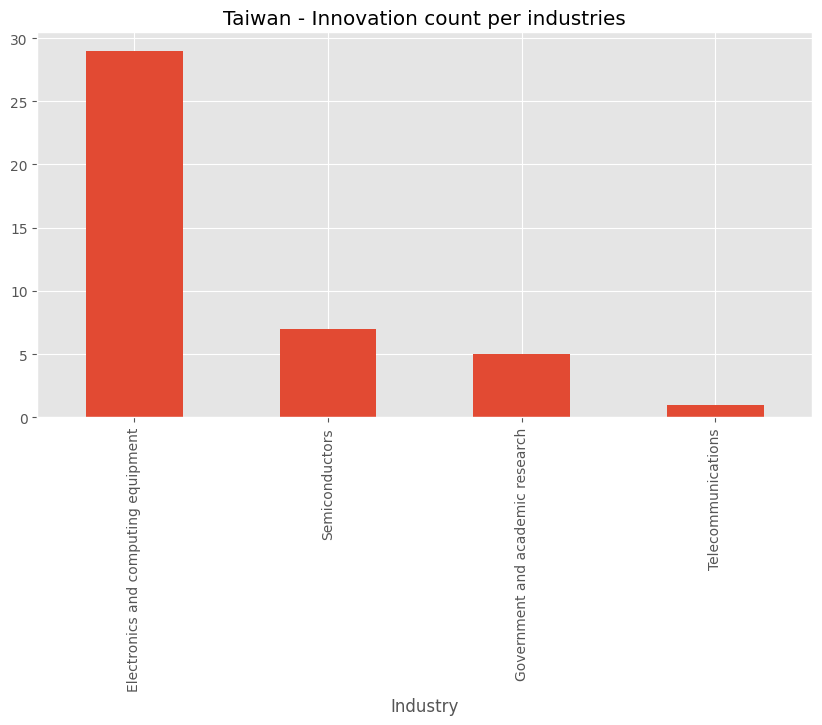

In [250]:
df[df["Region/Country"] == "Taiwan"].groupby("Industry")["Recognition"].sum().sort_values(ascending=False).plot\
(kind="bar", figsize=(10,5), title="Taiwan - Innovation count per industries")

In [252]:
df.sample(2)

,Innovator,Region/Country,Industry,Highlights,Recognition
186,TSMC,Taiwan,Semiconductors,unknown,1
115,MediaTek,Taiwan,Semiconductors,unknown,5


In [254]:
df["Region/Country"].unique()

array(['United States', 'China, Mainland', 'Germany', 'France',
       'South Korea', 'Japan', 'United Kingdom', 'Switzerland', 'Canada',
       'Russia', 'Netherlands', 'Taiwan', 'Finland', 'Liechtenstein',
       'Sweden', 'Belgium', 'Saudi Arabia'], dtype=object)

<Axes: title={'center': 'Innovation count per countries'}, xlabel='Region/Country'>

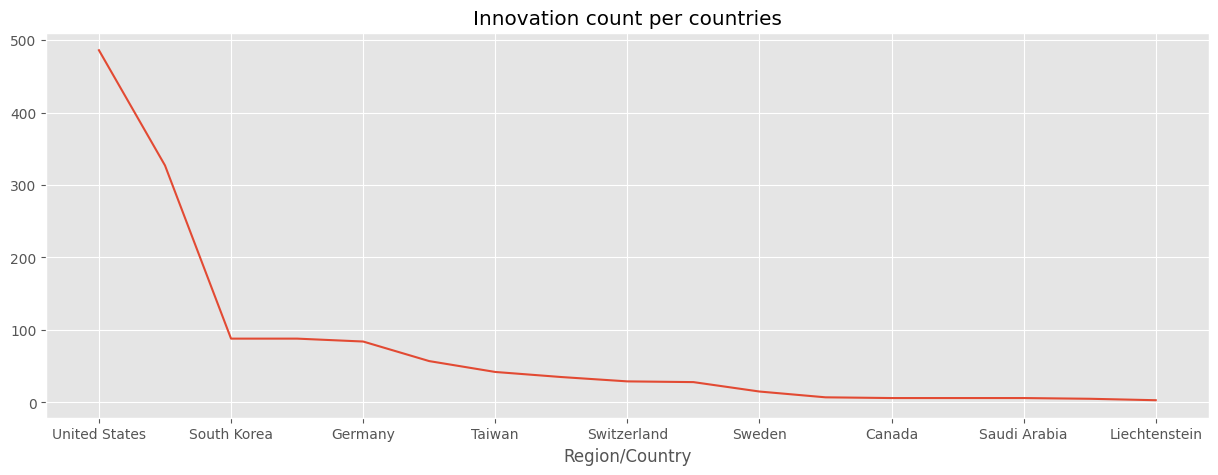

In [259]:
df.groupby("Region/Country")["Recognition"].sum().sort_values(ascending=False).plot\
(kind="line", figsize=(15,5), title="Innovation count per countries")

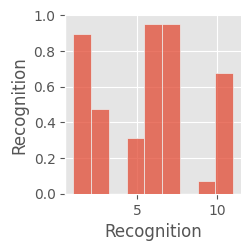

In [262]:
#pairplot
sns.pairplot(df)
plt.show()